In [2]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
grades = pd.read_csv('../EPM_dataset/Data/Yongwon/grades3.csv',index_col = 0)

grades = grades.iloc[:,:-5]

In [5]:
for i in range(2,7):
    #grades['FIN'] = grades.iloc[:,6:10].sum(axis = 1)
    grades[f'MID{i}_Rank'] = grades[f'MID{i}'].rank(pct= True)
    grades[f'MID{i}_Hierachy'] = 0
    grades.loc [grades[f'MID{i}_Rank'] > 0.66,f'MID{i}_Hierachy'] = 0
    grades.loc[(grades[f'MID{i}_Rank']<= 0.66 ) & (grades[f'MID{i}_Rank'] > 0.33 ) ,f'MID{i}_Hierachy'] = 1
    grades.loc[grades[f'MID{i}_Rank'] <= 0.33,f'MID{i}_Hierachy'] = 2

#grades['FIN'] = grades.iloc[:,6:10].sum(axis = 1)
grades['FIN_Rank'] = grades['final_score'].rank(pct = True)
grades['FIN_Hierachy'] = 0
grades.loc [grades['FIN_Rank'] > 0.66,'FIN_Hierachy'] = 0
grades.loc[(grades['FIN_Rank']<= 0.66 ) & (grades['FIN_Rank'] > 0.33 ) ,'FIN_Hierachy'] = 1
grades.loc[grades['FIN_Rank'] <= 0.33,'FIN_Hierachy'] = 2

grades

MID2      MID3      MID4      MID5      MID6      FIN2      FIN3  \
0   0.873680 -1.739299  0.139648  0.503558  0.221767 -0.881542  0.730296   
1   0.359568  0.706238  0.139648  0.503558 -0.936902 -0.053427 -0.134895   
2   0.102203  0.706238  0.139648  0.503558 -1.863836  0.360631  0.730296   
3   1.388100  1.055601  0.639157  0.030519  0.685234 -0.881542 -1.432682   
4   0.873680  1.055601  0.639157  0.503558  0.685234  0.774689  0.730296   
..       ...       ...       ...       ...       ...       ...       ...   
88  0.616624 -0.691212 -4.355936  0.030519 -1.863836 -0.881542 -1.000087   
89  0.616624  1.055601 -0.359862  0.030519 -0.009967 -0.053427 -1.000087   
90 -0.669273 -1.739299 -4.355936  0.030519 -1.863836 -0.053427 -0.134895   
91  1.388100 -1.739299  0.139648  0.503558  0.685234 -0.053427  0.730296   
92 -1.697806  0.706238 -4.355936 -3.280754 -1.863836 -0.881542  0.730296   

        FIN4      FIN5      FIN6  ...  MID3_Rank  MID3_Hierachy  MID4_Rank  \
0   1.243222  1.569829  1.448182  ...   0.080645              2   0.467742   
1   0.278217  0.011825 -0.824042  ...   0.661290              0   0.467742   
2   1.243222  0.470062  1.103906  ...   0.661290              0   0.467742   
3  -0.928039 -0.904647 -0.479766  ...   0.870968              0   0.833333   
4  -1.169290  1.019946 -0.961753  ...   0.870968              0   0.833333   
..       ...       ...       ...  ...        ...            ...        ...   
88 -1.048665 -1.179589 -1.168319  ...   0.268817              2   0.026882   
89  0.036966 -1.179589 -0.961753  ...   0.870968              0   0.166667   
90 -1.410541 -1.179589 -1.168319  ...   0.080645              2   0.026882   
91  1.122596  1.203240  1.413755  ...   0.080645              2   0.467742   
92 -0.928039 -1.179589  0.346498  ...   0.661290              0   0.026882   

    MID4_Hierachy  MID5_Rank  MID5_Hierachy  MID6_Rank  MID6_Hierachy  \
0               1   0.709677              0   0.526882              1   
1               1   0.709677              0   0.204301              2   
2               1   0.709677              0   0.069892              2   
3               0   0.295699              2   0.688172              0   
4               0   0.709677              0   0.688172              0   
..            ...        ...            ...        ...            ...   
88              2   0.295699              2   0.069892              2   
89              2   0.295699              2   0.419355              1   
90              2   0.295699              2   0.069892              2   
91              1   0.709677              0   0.688172              0   
92              2   0.043011              2   0.069892              2   

    FIN_Rank  FIN_Hierachy  
0   0.870968             0  
1   0.419355             1  
2   0.806452             0  
3   0.225806             2  
4   0.483871             1  
..       ...           ...  
88  0.134409             2  
89  0.268817             2  
90  0.215054             2  
91  0.892473             0  
92  0.322581             2  

[93 rows x 25 columns]

In [6]:
# load data
var_list = []
for i in range(2,7):
    path = '../EPM_dataset/Data/Yinsheng/variables_session_' + str(i) + '_not_filtered.csv'
    #path = '../EPM_dataset/Data/Seyoung/variables_session_' + str(i) + '.csv'
    var = pd.read_csv(path)
    var_list.append(var)

# verify
var_list[0].head()

ID  DUR_Aulaweb  DUR_Blank    DUR_Deeds  DUR_Diagram  DUR_FSM  DUR_Other  \
0   1       1108.0    15296.0   33635659.0    8685148.0      0.0    39820.0   
1   2      13063.0    27628.0  152742872.0     898633.0      0.0   419913.0   
2   3       6891.0  1894304.0   64732143.0     779097.0      0.0  3677630.0   
3   4      37073.0   538424.0  126805821.0     255194.0     93.0  3453213.0   
4   5       8813.0    11555.0   79309264.0     347358.0      0.0    49656.0   

   DUR_Properties    DUR_Study  DUR_TextEditor  ...  MW_TextEditor  \
0          3493.0  100878318.0     118425808.0  ...         1191.0   
1        294227.0   14462337.0     347521629.0  ...            0.0   
2            93.0  118419039.0     424103241.0  ...            0.0   
3          1170.0    1972457.0     196191366.0  ...         2022.0   
4          9502.0   48292987.0     275261872.0  ...         1280.0   

   MWC_Aulaweb  MWC_Blank  MWC_Deeds  MWC_Diagram  MWC_FSM  MWC_Other  \
0          0.0        0.0        0.0          0.0      0.0        0.0   
1          0.0        0.0        0.0          0.0      0.0        0.0   
2          0.0        0.0        0.0          0.0      0.0        0.0   
3          0.0        0.0        2.0          0.0      0.0        0.0   
4          0.0        0.0        0.0          0.0      0.0        0.0   

   MWC_Properties  MWC_Study  MWC_TextEditor  
0             0.0        0.0             0.0  
1             0.0        0.0             0.0  
2             0.0        0.0             0.0  
3             0.0        0.0             0.0  
4             0.0        0.0             0.0  

[5 rows x 64 columns]

In [7]:
# Scaler
scaled_var_list = []
for var in var_list:
    # I'm selecting only numericals to scale
    numerical = var.select_dtypes(include='float64').columns
    # This will transform the selected columns and merge to the original data frame
    var.loc[:,numerical] = StandardScaler().fit_transform(var.loc[:,numerical])
    scaled_var_list.append(var)
    
# verify
len(scaled_var_list)

5

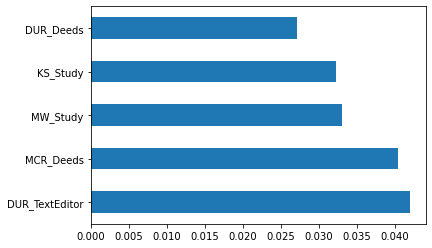

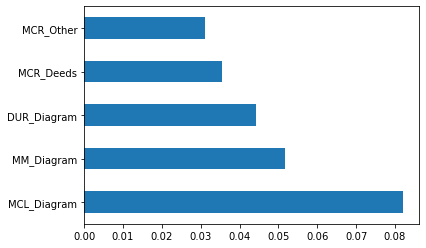

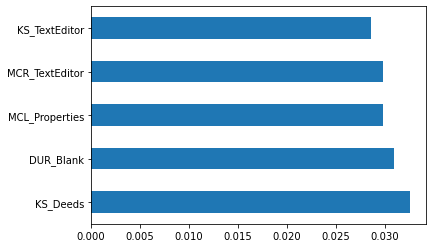

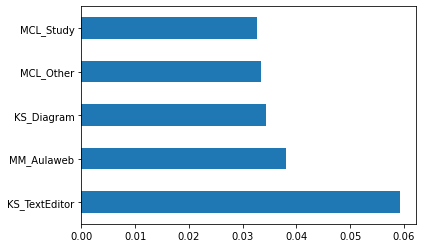

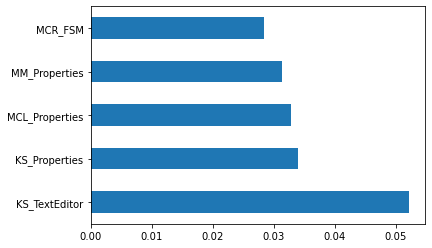

In [6]:
# Feature Selection
# Tree-based feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=50)

for i in range(5):
    data = pd.merge(scaled_var_list[i], grades[['ID',f'MID{i+2}_Hierachy']], how='inner', on=['ID'])
    X = data.drop(columns = ['ID',f'MID{i+2}_Hierachy'])
    y = data[f'MID{i+2}_Hierachy']
    #y = data['FIN_Hierachy']
    clf = clf.fit(X, y)
    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
    feat_importances.nlargest(5).plot(kind='barh')
    plt.show()
    

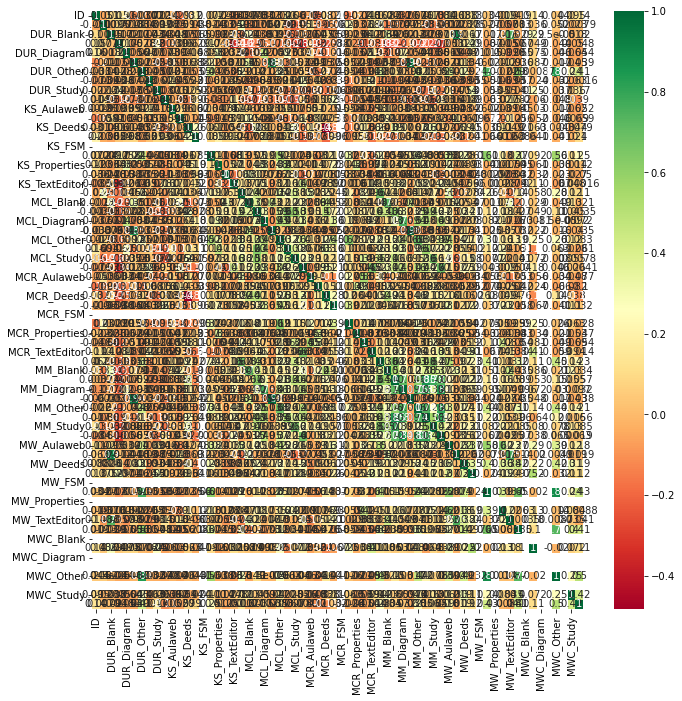

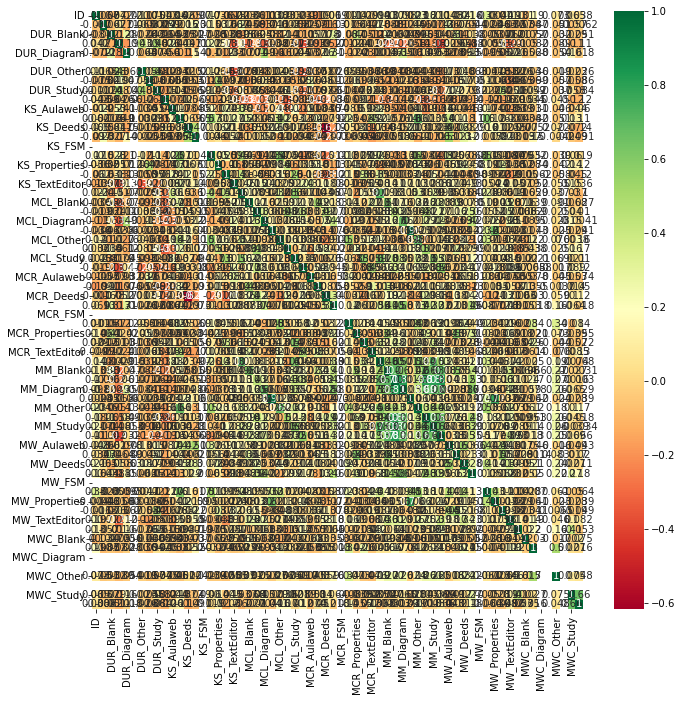

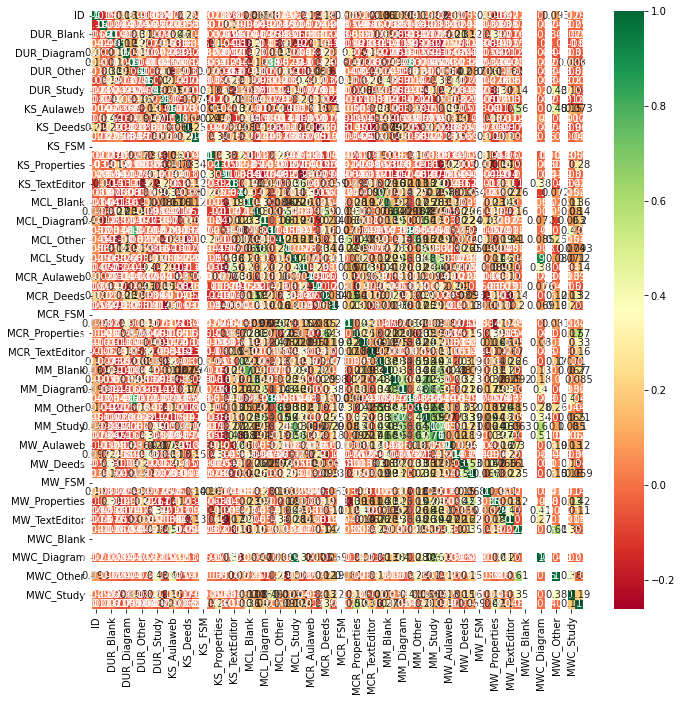

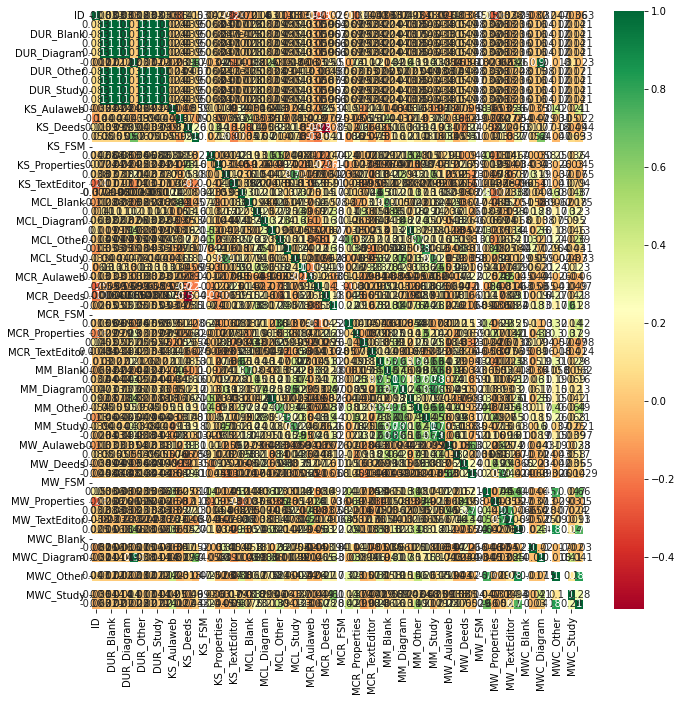

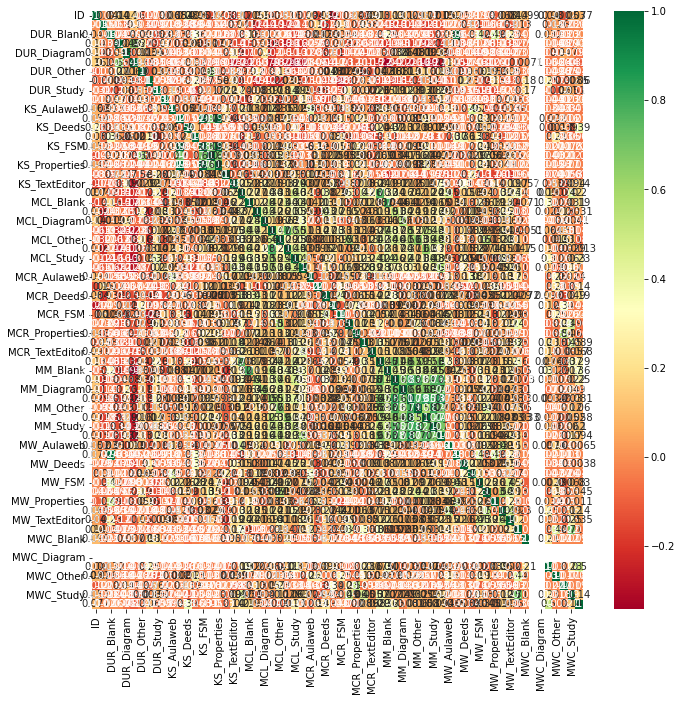

In [7]:
import seaborn as sns
# Checking the correlations between variables
for i, session in enumerate(scaled_var_list):
    corrmat = scaled_var_list[i].corr()
    top_corr_features = corrmat.index
    plt.figure(figsize=(11,11))
    g=sns.heatmap(scaled_var_list[i][top_corr_features].corr(),annot=True,cmap="RdYlGn")

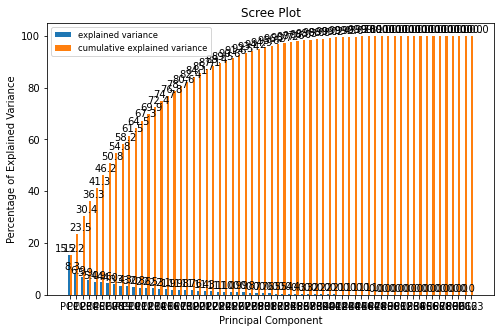

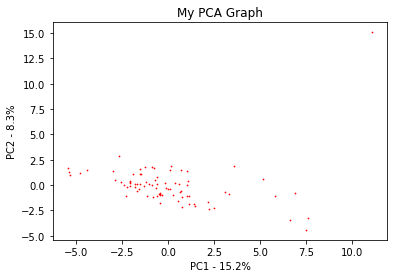

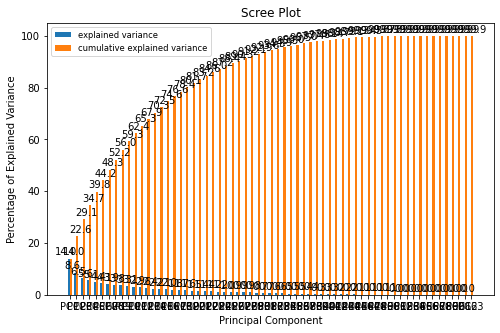

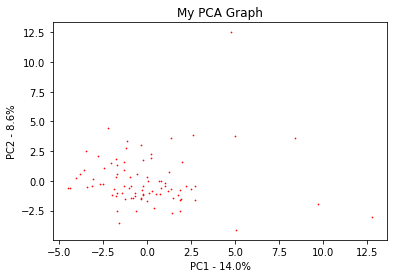

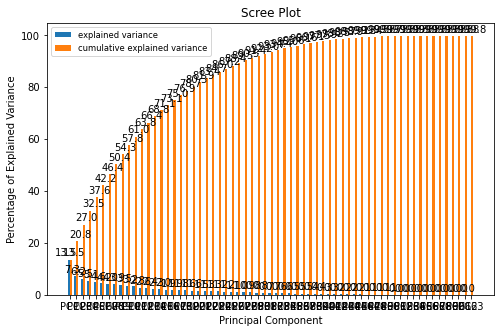

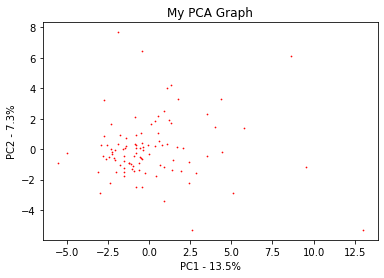

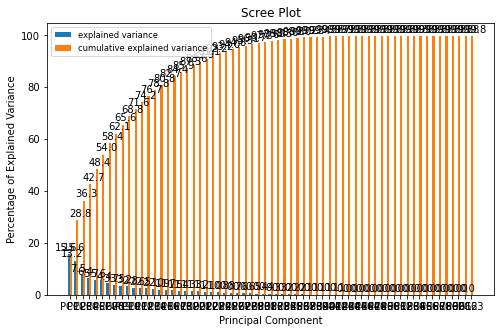

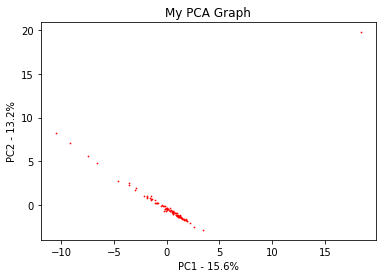

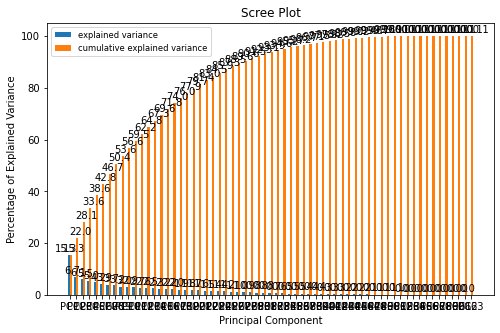

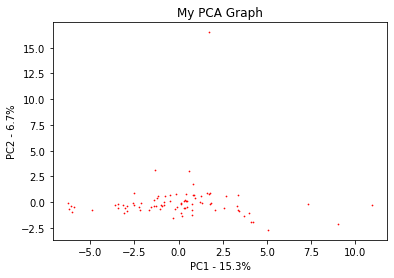

In [8]:
#PCA
%matplotlib inline
for i in range(5):
    dataforpca = scaled_var_list[i].drop(columns = 'ID')
    pca = PCA() # create a PCA object
    pca.fit(dataforpca) # do the math
    pca_data = pca.transform(dataforpca) # get PCA coordinates for scaled_data
    # Draw a scree plot and a PCA plot #
    #The following code constructs the Scree plot
    per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
    acc_var = np.round(np.cumsum(per_var),decimals =1 )# the accumulated variance
    # acc_var = [100.0 if var>100 else var for var in acc_var ]
    labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
    plt.figure(figsize = (8,5))
    bar1 = plt.bar(x = (np.arange(1,len(per_var)+1)*3-0.5), height=per_var, width = 1,label = 'explained variance')
    bar2 = plt.bar(x = (np.arange(1,len(per_var)+1)*3+0.5), height=acc_var, width = 1,label = 'cumulative explained variance')
    plt.gca().set_xticks(np.arange(1,len(per_var)+1)*3)
    plt.gca().set_xticklabels(labels)

    for idx,rect in enumerate(bar1):
        height =per_var[idx]
        plt.gca().annotate(height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(-3, 1.5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    for idx,rect in enumerate(bar2):
        height = acc_var[idx]
        plt.gca().annotate(height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(3, 1.5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.ylabel('Percentage of Explained Variance')
    plt.xlabel('Principal Component')
    plt.title('Scree Plot')
    plt.legend(loc= 'best',fontsize='small') 
    #plt.savefig('scree_plot.jpg',dpi=200)
    plt.show()

    #the following code makes a fancy looking plot using PC1 and PC2
    pca_df = pd.DataFrame(pca_data, index=dataforpca.index.values, columns=labels)

    plt.scatter(pca_df.PC1, pca_df.PC2,c='r', s = 0.5)
    plt.title('My PCA Graph')
    plt.xlabel('PC1 - {0}%'.format(per_var[0]))
    plt.ylabel('PC2 - {0}%'.format(per_var[1]))

    # plt.savefig('PCA distribution.jpg',dpi=200)
    plt.show()

    # Determine which attributes had the biggest influence on PC1
    ## get the name of the top 10 measurements (genes) that contribute
    ## most to pc1.
    ## first, get the loading scores

    loading_scores1 = pd.DataFrame(columns=dataforpca.columns) 
    for i in range(5):
        loading_scores1=loading_scores1.append(pd.DataFrame(pca.components_[i].reshape(1,-1),columns=dataforpca.columns,index=['PC'+str(i+1)]))

    loading_scores1.loc['Total',:]=loading_scores1.abs().sum(axis = 0)
    # print(loading_scores.loc['Total',:].sort_values(ascending=False)[:10])
    loading_scores1.loc['weighted_total',:] = 0
    for i in range(5):
        loading_scores1.loc['weighted_total',:]=loading_scores1.loc['weighted_total',:]+loading_scores1.abs().iloc[i] *per_var[i]/100
    top_features1 = loading_scores1.loc['weighted_total',:].sort_values(ascending=False).index.values

Silhouette Score: 2
DBS: 9
[45, 7, 23]


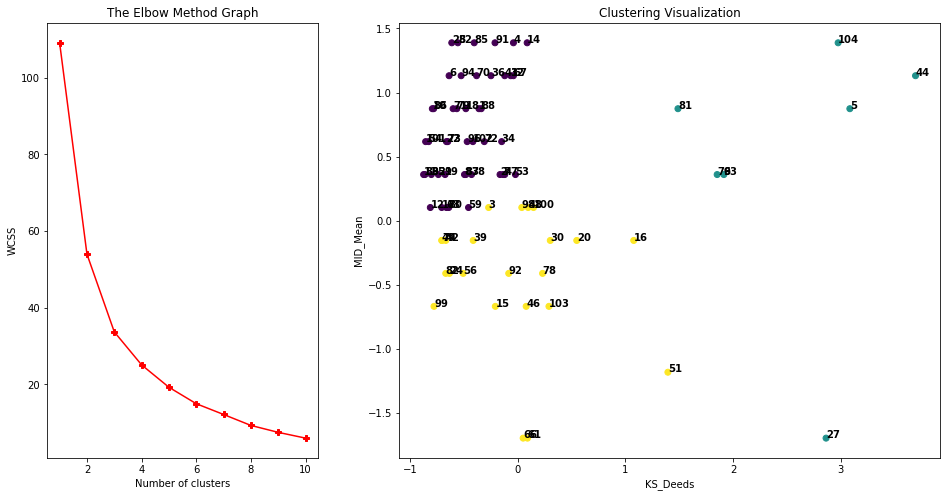

Silhouette Score: 2
DBS: 4
[38, 28, 11]


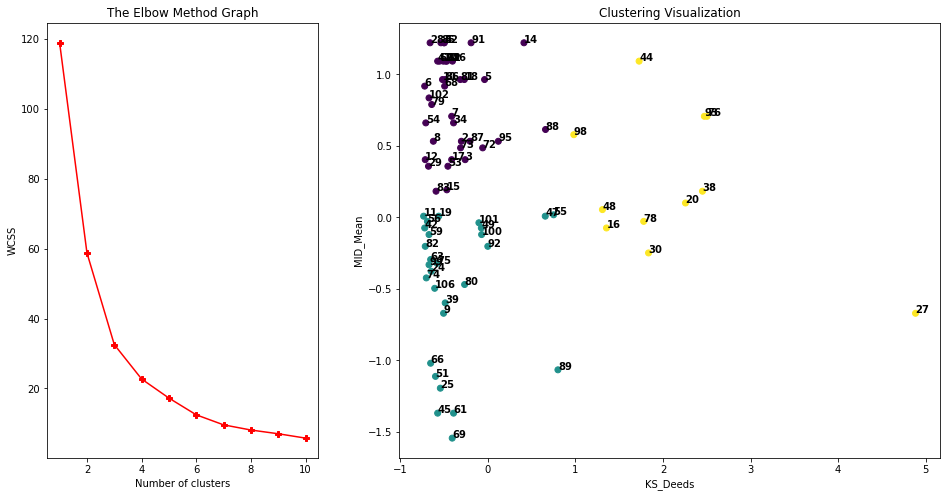

Silhouette Score: 2
DBS: 2
[40, 43, 4]


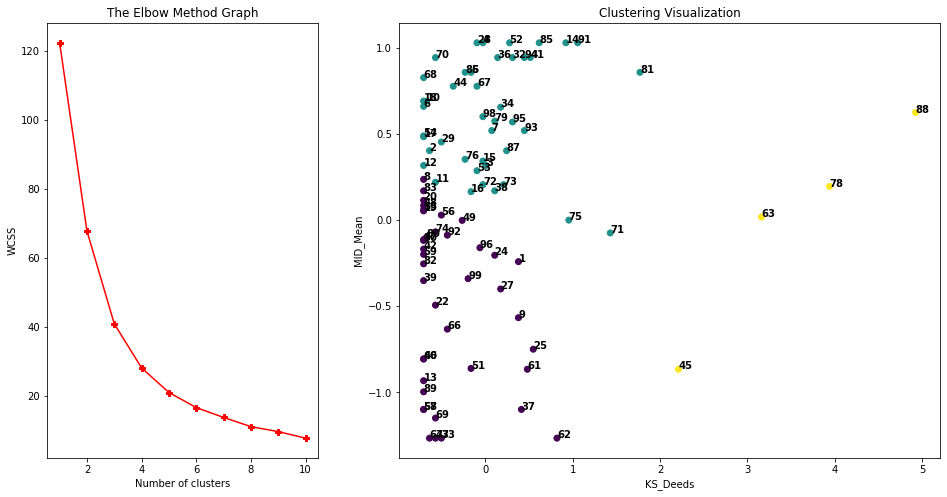

Silhouette Score: 2
DBS: 2
[21, 51, 12]


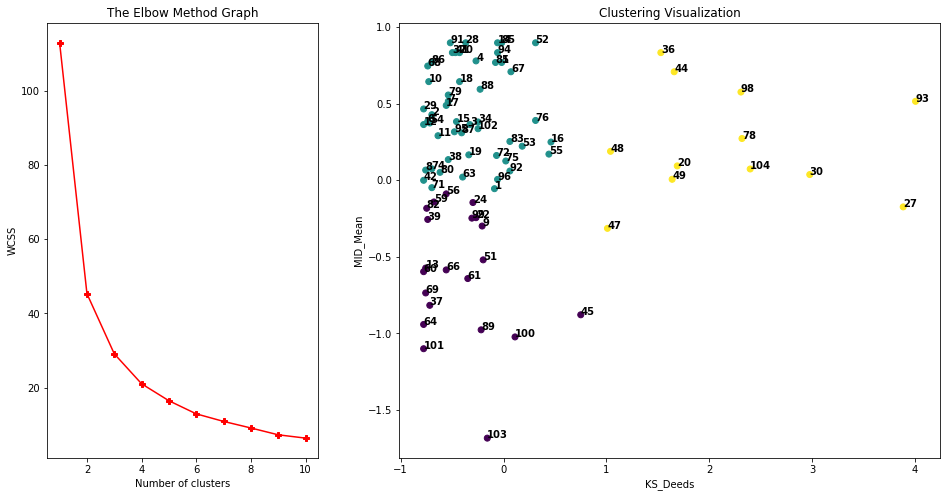

Silhouette Score: 2
DBS: 8
[40, 18, 21]


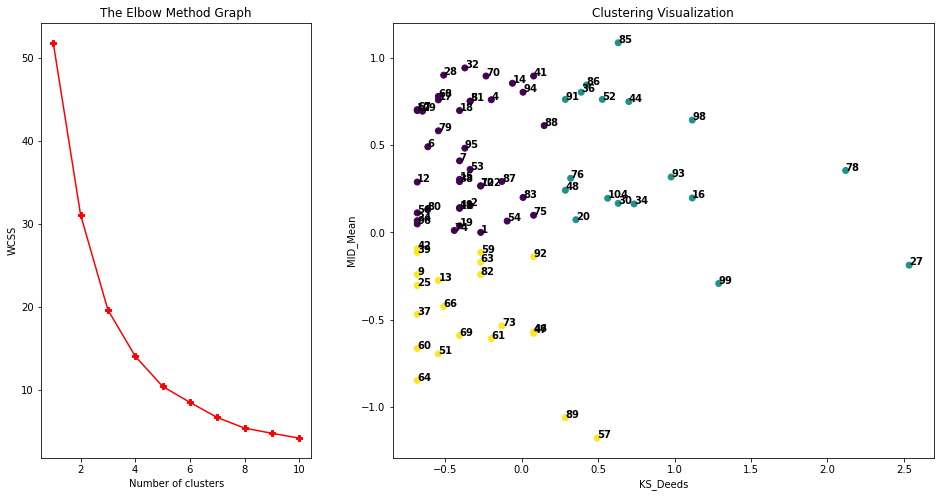

In [105]:
# K-Means considering all the previous sessions
from matplotlib import gridspec

cluster_results = []
for i in range(5):
    #data_new =  scaled_var_list[i].drop(columns = 'ID')
    cols = [f'MID{n+2}' for n in range(i+1)]
    cols.append('ID')
    data_new = pd.merge(scaled_var_list[i], grades[cols], how='inner', on=['ID'])
    Mid_cols = [col for col in  data_new.columns.values if col.startswith('MID')]
    data_new['MID_Mean'] = data_new[Mid_cols].mean(axis = 1)
    
    features = ['KS_Deeds','MID_Mean']
    data_withID = data_new
    data_new = data_new[features]
    wcss=[]
    for clu_n in range(1,11): 
        kmeans = KMeans(n_clusters=clu_n, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
        kmeans.fit(data_new)
        #kmeans algorithm fits to the X dataset
        wcss.append(kmeans.inertia_)
    
    fig = plt.figure(figsize=(16, 8)) 
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2]) 
    ax0 = plt.subplot(gs[0])
    #kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
    #4.Plot the elbow graph
    ax0.plot(range(1,11),wcss,'rP-')
    ax0.set_title('The Elbow Method Graph')
    ax0.set_xlabel('Number of clusters')
    ax0.set_ylabel('WCSS')
    #plt.tight_layout()
    #plt.savefig('elbow.jpg',dpi=300)


    # 设定最终希望得到的类数量
    scores = []
    si_scores = []
    cluster_range = range(2,10)
    for clu_n in cluster_range:
        clf_KMeans=KMeans(n_clusters=clu_n,random_state=4)
        clf_KMeans.fit(data_new)
        labels=clf_KMeans.labels_
        score=davies_bouldin_score(data_new, labels)
        scores.append(score) #计算每次聚类的得分
        si_score=silhouette_score(data_new, labels)
        si_scores.append(si_score)
    
    cluster_num_ss =np.argmax(si_scores)+2
    print("Silhouette Score:",cluster_num_ss)
    cluster_num_dbs =np.argmin(scores)+2
    print("DBS:",cluster_num_dbs)
    cluster_result = {}
    for pred in np.unique(y_pred):
        cluster_result[pred] = group_IDs.loc[group_IDs.y_pred == pred, 'ID'].to_list()
        
    cluster_results.append(cluster_result)
       
    # How many clusters?
    cluster_num = 3
    clf = KMeans(n_clusters=cluster_num,n_init=15, tol = 0 ,random_state=4 , verbose=0)#用不同的初始化质心运行算法的次数，这个值一般对于k较大时候适用，默认是10
    y_pred=clf.fit_predict(data_new)
    data_withID['y_pred'] = y_pred
    group_IDs = data_withID[['ID','y_pred']]
    print([sum(y_pred == i) for i in range(cluster_num)])
    
    ax1 = plt.subplot(gs[1])
    ax1.scatter(data_new.iloc[:, 0], data_new.iloc[:, 1], c=y_pred)
    
    #Annotation
    for i, ID in enumerate(data_withID['ID']):
        ax1.annotate(ID, (data_new.iloc[i,0], data_new.iloc[i,1]),  weight='bold')
    
    ax1.set_title("Clustering Visualization")
    ax1.set_xlabel(f'{features[0]}')
    ax1.set_ylabel(f'{features[1]}')
    plt.show()

In [109]:
for cluster_result in cluster_results:
    for i in range(3):
        print(f'Group {i}:',cluster_result[i])

Group 0: [1, 2, 4, 5, 6, 7, 10, 11, 12, 14, 15, 17, 18, 19, 24, 28, 29, 32, 38, 41, 49, 53, 54, 56, 67, 68, 70, 72, 74, 75, 79, 80, 81, 83, 87, 88, 94, 95, 96, 102]
Group 1: [16, 20, 27, 30, 34, 36, 44, 48, 52, 76, 78, 85, 86, 91, 93, 98, 99, 104]
Group 2: [9, 13, 25, 37, 39, 42, 46, 47, 51, 57, 59, 60, 61, 63, 64, 66, 69, 73, 82, 89, 92]
Group 0: [1, 2, 4, 6, 7, 8, 10, 11, 12, 14, 17, 18, 19, 22, 28, 29, 32, 34, 36, 38, 41, 47, 52, 53, 54, 59, 63, 67, 70, 71, 72, 73, 79, 80, 83, 85, 86, 87, 88, 91, 94, 95, 96, 101, 102]
Group 1: [5, 27, 44, 76, 81, 93, 104]
Group 2: [3, 15, 16, 20, 24, 30, 39, 42, 46, 48, 49, 51, 56, 61, 66, 74, 78, 82, 92, 98, 99, 100, 103]
Group 0: [2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 15, 17, 18, 28, 29, 32, 34, 36, 41, 52, 53, 54, 67, 68, 70, 72, 73, 79, 81, 83, 85, 86, 87, 88, 91, 94, 95, 102]
Group 1: [9, 11, 19, 24, 25, 39, 42, 45, 47, 49, 51, 55, 56, 59, 61, 63, 66, 69, 74, 75, 80, 82, 89, 92, 99, 100, 101, 106]
Group 2: [16, 20, 27, 30, 38, 44, 48, 76, 78, 93, 98

DBS: 9
Silhouette Score: 3
[18, 34, 21, 2]


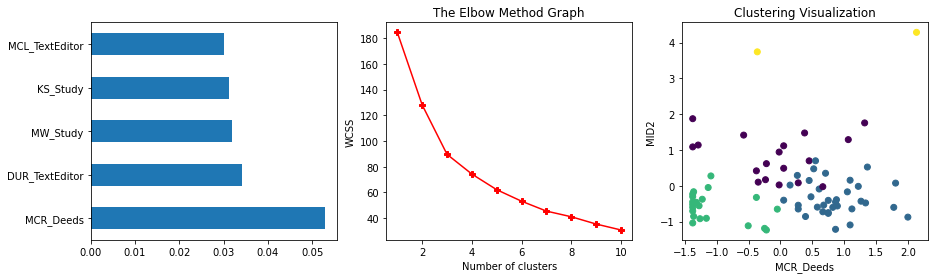

DBS: 3
Silhouette Score: 3
[26, 31, 3, 17]


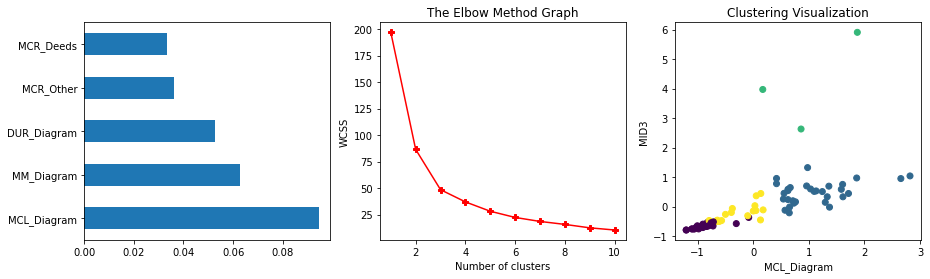

DBS: 3
Silhouette Score: 3
[36, 36, 11, 4]


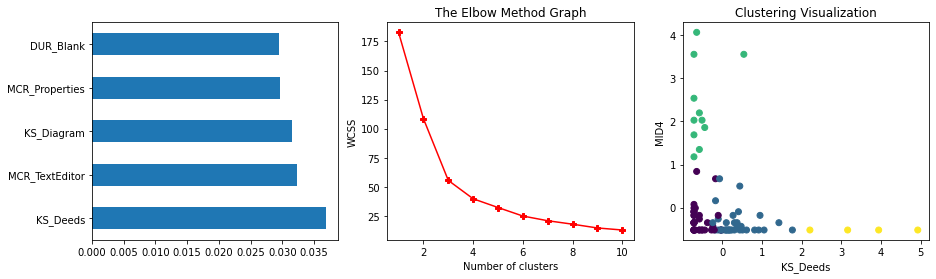

DBS: 8
Silhouette Score: 3
[33, 26, 3, 22]


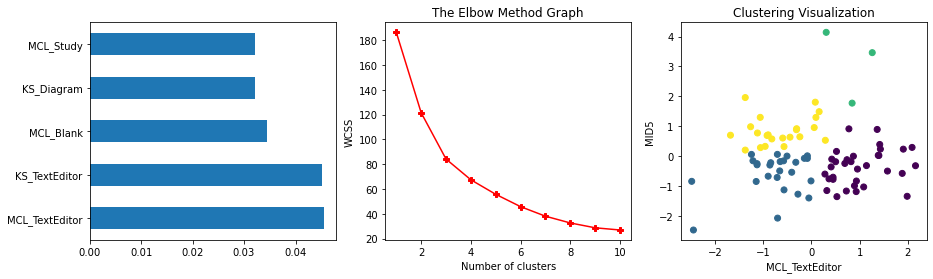

DBS: 9
Silhouette Score: 4
[6, 38, 4, 31]


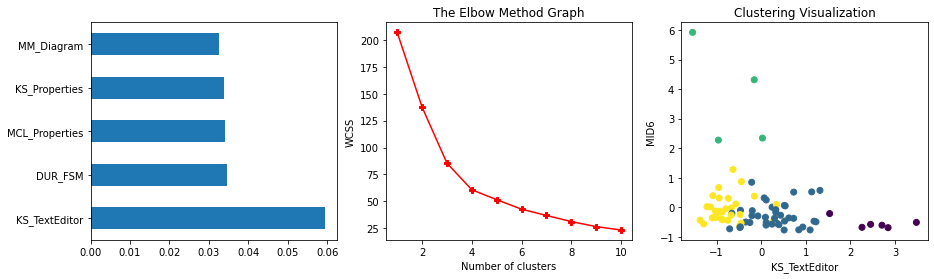

In [10]:
# K-Means considering only the last session

for i in range(5):
    plt.figure(figsize=(15, 4))
    plt.subplot(131)
    data_tree = pd.merge(scaled_var_list[i], grades[['ID',f'MID{i+2}_Hierachy']], how='inner', on=['ID'])
    X_tree = data_tree.drop(columns = ['ID',f'MID{i+2}_Hierachy'])
    y_tree = data_tree[f'MID{i+2}_Hierachy']
    #y = data['FIN_Hierachy']
    clf = ExtraTreesClassifier(n_estimators=50)
    clf = clf.fit(X_tree, y_tree)
    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
    feature = feat_importances.nlargest(2)
    feat_importances.nlargest(5).plot(kind='barh')
#data_new =  scaled_var_list[i].drop(columns = 'ID')
    
    cols = [f'MID{i+2}']
    cols.append('ID')
    data_new = pd.merge(scaled_var_list[i], grades[cols], how='inner', on=['ID'])    
    features = feature.index.to_list()+[f'MID{i+2}']
    data_new = data_new[features]
    wcss=[]
    for clu_n in range(1,11): 
        kmeans = KMeans(n_clusters=clu_n, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
        kmeans.fit(data_new)
        #kmeans algorithm fits to the X dataset
        wcss.append(kmeans.inertia_)
    
    plt.subplot(132)
    #kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.
    #4.Plot the elbow graph
    plt.plot(range(1,11),wcss,'rP-')
    plt.title('The Elbow Method Graph')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    #plt.tight_layout()
    #plt.savefig('elbow.jpg',dpi=300)
    #plt.show()

    # 设定最终希望得到的类数量
    scores = []
    cluster_range = range(2,10)
    for clu_n in cluster_range:
        clf_KMeans=KMeans(n_clusters=clu_n,random_state=4)
        clf_KMeans.fit(data_new)
        labels=clf_KMeans.labels_
        score=davies_bouldin_score(data_new, labels)
        scores.append(score) #计算每次聚类的得分
    cluster_num_dbs =np.argmin(scores)+2
    print("DBS:",cluster_num_dbs)
    si_scores = []
    
    for clu_n in cluster_range:
        clf_KMeans=KMeans(n_clusters=clu_n,random_state=4)
        clf_KMeans.fit(data_new)
        labels=clf_KMeans.labels_
        si_score=silhouette_score(data_new, labels)
        si_scores.append(si_score)
    cluster_num_ss =np.argmax(si_scores)+2
    print("Silhouette Score:",cluster_num_ss)
    
    # How many clusters?
    cluster_num = 4
    clf = KMeans(n_clusters=cluster_num,n_init=15, tol = 0 ,random_state=4)# , verbose=1)#用不同的初始化质心运行算法的次数，这个值一般对于k较大时候适用，默认是10
    y_pred=clf.fit_predict(data_new)
    print([sum(y_pred == i) for i in range(cluster_num)])
    plt.subplot(133)
    plt.scatter(data_new.iloc[:, 0], data_new.iloc[:, 1], c=y_pred)

    plt.title("Clustering Visualization")
    plt.xlabel(f'{features[0]}')
    plt.ylabel(f'{features[-1]}')
    plt.show()    
    #scaled_var_list[i]['Cluster_Label'] = y_pred

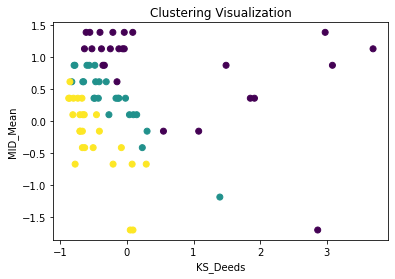

[25, 25, 25]


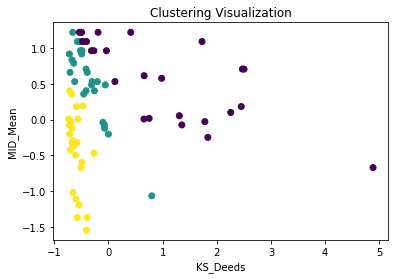

[26, 26, 25]


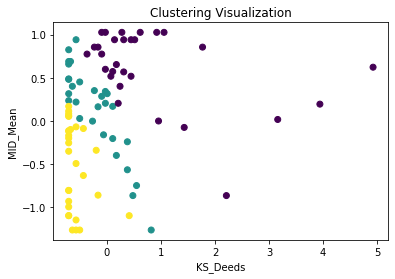

[29, 29, 29]


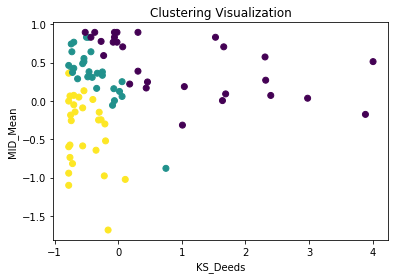

[28, 28, 28]


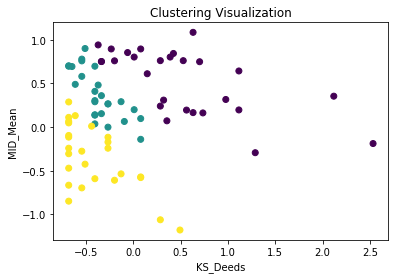

[26, 27, 26]


In [18]:
# No K-means
# Only divide students by their rankings of overall performance
# Capable of equal division
# Considering all previous sessions
for i in range(5):
    #data_new =  scaled_var_list[i].drop(columns = 'ID')
    cols = [f'MID{n+2}' for n in range(i+1)]
    cols.append('ID')
    data_new = pd.merge(scaled_var_list[i], grades[cols], how='inner', on=['ID'])
    Mid_cols = [col for col in  data_new.columns.values if col.startswith('MID')]
    data_new['MID_Mean'] = data_new[Mid_cols].mean(axis = 1)
    
    features = ['KS_Deeds','MID_Mean']
    data_new = data_new[features]
    data_new['Overall Performance'] = data_new.sum(axis = 1 )
  
    # How many clusters?
    cluster_num = 3
    data_new['y_pred'] = 0
    data_new.loc[data_new['Overall Performance'].rank(pct = True)<(1-2/cluster_num),'y_pred'] = 2
    data_new.loc[data_new['Overall Performance'].rank(pct = True)>(1-2/cluster_num),'y_pred'] = 1
    data_new.loc[data_new['Overall Performance'].rank(pct = True)>(1-1/cluster_num),'y_pred'] = 0
    
    plt.scatter(data_new.iloc[:, 0], data_new.iloc[:, 1], c=data_new['y_pred'])
    
    plt.title("Clustering Visualization")
    plt.xlabel(f'{features[0]}')
    plt.ylabel(f'{features[1]}')
    plt.show()
    print([sum(data_new['y_pred'] == i) for i in data_new['y_pred'].unique()])